In [32]:
from utilities import * 
import GetTranscription

In [33]:
lvpath ="E:\Datasets\Voice\Librivox\dev\LibriSpeech\dev-clean"
libri_train ="E:\Datasets\Voice\LibriSpeech"
mcvpath ="E:\Datasets\Voice\Mozilla Common Voice\en\cv-corpus-6.1-2020-12-11\en"
single_word = "./samples/but bowl.wav"

In [34]:
clips =fcs.get_audio_files(libri_train)
len(clips)

28539

clips in dataset:  28539
hop_length:  80
transcription:  AND HIS BEST SUIT OF CLOTHES WHICH WAS PLAIN PROOF THAT HE WAS GOING OUT OF AVONLEA AND HE HAD THE BUGGY AND THE SORREL MARE WHICH BETOKENED THAT HE WAS GOING A CONSIDERABLE DISTANCE NOW WHERE WAS MATTHEW CUTHBERT GOING AND WHY WAS HE GOING THERE
words:  47
(234480,)


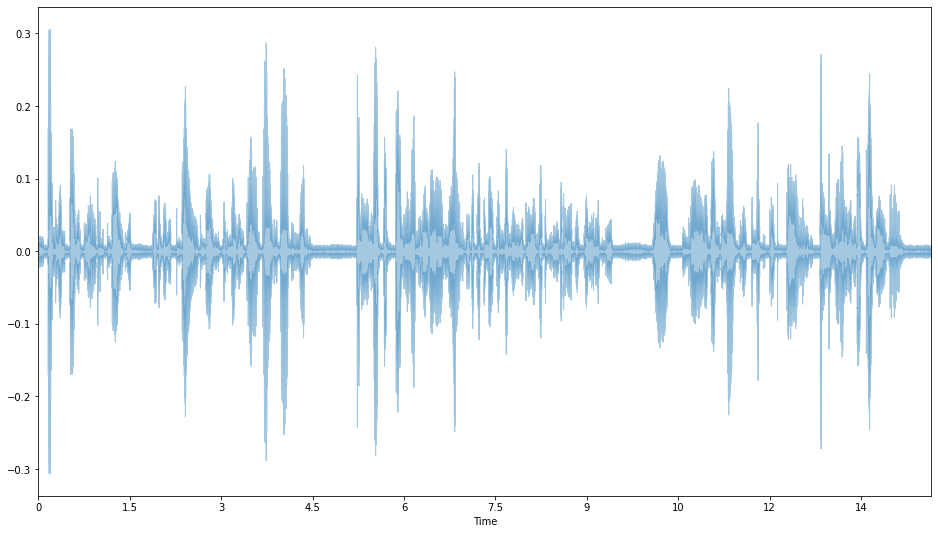

In [56]:
plt.figure(figsize=(16,9))
sr = 16000
hop_length = int(sr/200)
frame_length = int(hop_length*2)
clips = fcs.get_audio_files(libri_train)
clip = clips[11]
audio, sr = librosa.load(clip, sr=sr)
transcription = GetTranscription.get_file_transcript(clip)
print("clips in dataset: ", len(clips))
print("hop_length: " ,hop_length)
print("transcription: ", transcription)
print("words: ", len(transcription.split(" ")))
print(audio.shape)
librosa.display.waveplot(audio,sr=sr,alpha=0.4)
ipd.Audio(audio, rate=sr)

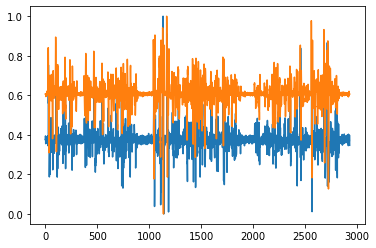

In [22]:
f = librosa.feature.rms(audio,hop_length=hop_length, frame_length= frame_length).flatten()
d = librosa.feature.delta(f)
rmse_diff = np.zeros_like(f)
rmse_diff[1:] = np.diff(f)
d_diff = np.zeros_like(d)
d_diff[1:] = np.diff(d)

plt.plot(normalize(rmse_diff))
plt.plot(normalize(d_diff))

In [23]:
audio.shape
#n.shape
hop_length

80

In [90]:
#Split by silence

from energy_split import *
segments = Split(audio,hop_length,frame_length,sr = sr ,min_duration=50, energy_threshold=0.03)
print(len(segments))
print(segments)

total = 0
for x in segments:
    total += x[1]-x[0]
print("...",total)
audio.shape

44
[[2400, 6800], [8160, 10880], [11920, 14960], [16480, 18080], [19120, 22080], [23120, 24160], [29920, 30880], [32640, 34640], [36800, 41840], [43840, 45920], [50560, 53760], [54640, 57920], [58720, 61440], [61680, 62640], [63360, 65600], [66000, 66880], [67120, 70560], [71280, 89440], [90480, 91680], [93680, 111600], [112000, 113280], [115120, 116160], [116880, 119440], [120160, 123280], [123920, 127120], [128160, 132160], [133760, 134720], [134880, 136560], [137760, 140000], [140800, 141840], [143200, 147200], [148800, 150400], [161280, 165600], [169040, 178720], [179120, 182960], [184720, 185760], [187120, 189360], [190560, 193120], [196400, 202320], [205120, 214560], [214800, 216160], [217280, 219440], [219680, 222480], [223280, 226320]]
... 154960


(234480,)

In [58]:
from m_dictionary import *
sectionphones = get_phonemes_for_sentence(sentence = transcription)
phone_array = []
for word in sectionphones:
    for char in word[0]:
        if char != "ˈ" and char != '\u200d':
            if char =='ː':
                phone_array[-1] = phone_array[-1]+char
            else:
                phone_array.append(char)
print(phone_array)
print(transcription)
print(sectionphones)
len(phone_array)

['æ', 'n', 'd', 'h', 'ɪ', 'z', 'b', 'ɛ', 's', 't', 's', 'uː', 't', 'ɒ', 'v', 'k', 'l', 'ə', 'ʊ', 'ð', 'z', 'w', 'ɪ', 't', 'ʃ', 'w', 'ɒ', 'z', 'p', 'l', 'e', 'ɪ', 'n', 'p', 'ɹ', 'uː', 'f', 'ð', 'æ', 't', 'h', 'i', 'w', 'ɒ', 'z', 'ɡ', 'ə', 'ʊ', 'ɪ', 'ŋ', 'a', 'ʊ', 't', 'ɒ', 'v', ' ', 'æ', 'n', 'd', 'h', 'i', 'h', 'æ', 'd', 'ð', 'ə', '/', ',', ' ', '/', 'ð', 'ə', '/', ',', ' ', '/', 'ð', 'i', 'b', 'ʌ', 'ɡ', 'i', 'æ', 'n', 'd', 'ð', 'ə', '/', ',', ' ', '/', 'ð', 'ə', '/', ',', ' ', '/', 'ð', 'i', 's', 'ɒ', 'ɹ', 'ə', 'l', 'm', 'ɛ', 'ɹ', 'w', 'ɪ', 't', 'ʃ', ' ', 'ð', 'æ', 't', 'h', 'i', 'w', 'ɒ', 'z', 'ɡ', 'ə', 'ʊ', 'ɪ', 'ŋ', 'e', 'ɪ', '/', ',', ' ', '/', 'ə', 'k', 'ə', 'n', 's', 'ɪ', 'd', 'ə', 'ɹ', 'ə', 'b', 'ə', 'l', 'd', 'ɪ', 's', 't', 'ə', 'n', 's', 'n', 'a', 'ʊ', 'w', 'e', 'ə', 'w', 'ɒ', 'z', 'm', 'æ', 'θ', 'j', 'u', 'k', 'ə', 'θ', 'b', 'ɝ', 't', 'ɡ', 'ə', 'ʊ', 'ɪ', 'ŋ', 'æ', 'n', 'd', 'w', 'a', 'ɪ', 'w', 'ɒ', 'z', 'h', 'i', 'ɡ', 'ə', 'ʊ', 'ɪ', 'ŋ', 'ð', 'e', 'ə']
AND HIS BEST SUIT OF C

195

In [59]:
all_bits = []
for segment in segments:
    starting = segment[0]
    segment_boundaries = Split2(audio[starting:segment[1]], hop_length=hop_length, frame_length=frame_length, sr= sr, min_duration=hop_length*10)
    for bit in segment_boundaries:
        #print((segment[0]+bit[0]), (segment[0]+bit[1]) )
        x1 =starting+bit[0]
        x2 =starting+bit[1]
        b = (x1,x2)
        #print(type(b))
        #print(segment[0]+bit[0],segment[0]+bit[1] )
        all_bits.append(b)
    #print(segment, "   ",segment_boundaries)
print(all_bits)
print("segmented phones: ", len(all_bits),"transcription phones: ",len(phone_array))
#print("segments",segments)

    

[(2400, 3202), (3202, 4115), (4115, 4942), (4942, 5792), (5792, 6800), (8160, 8967), (8967, 9778), (9778, 10880), (11920, 12727), (12727, 13735), (13735, 14960), (16480, 18080), (19120, 20762), (20762, 22080), (23120, 24160), (29920, 30880), (32640, 33486), (33486, 34640), (36800, 38111), (38111, 39101), (39101, 39901), (39901, 41840), (43840, 45004), (45004, 45920), (50560, 51378), (51378, 52196), (52196, 53760), (54640, 56524), (56524, 57920), (58720, 59671), (59671, 61440), (61680, 62640), (63360, 64212), (64212, 65600), (66000, 66880), (67120, 67946), (67946, 68751), (68751, 69555), (69555, 70560), (71280, 72148), (72148, 72959), (72959, 73759), (73759, 74559), (74559, 75360), (75360, 76164), (76164, 76964), (76964, 77765), (77765, 78571), (78571, 79371), (79371, 80172), (80172, 80984), (80984, 81787), (81787, 82587), (82587, 83387), (83387, 84207), (84207, 85013), (85013, 85815), (85815, 86624), (86624, 87670), (87670, 89440), (90480, 91680), (93680, 94651), (94651, 95506), (95506

C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2210: RuntimeWarning: invalid value encountered in log1p
  smooth = np.exp(-gain * (np.log(eps) + np.log1p(S_smooth / eps)))
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2218: RuntimeWarning: invalid value encountered in log1p
  S_out = (bias ** power) * np.expm1(power * np.log1p(S * smooth / bias))


In [41]:
voiced = []
silenced = np.empty(audio.shape)
for x in segments:
    silenced[x[0]:x[1]] = audio[x[0]:x[1]]
    for i in audio[x[0]:x[1]]:
        voiced.insert( len(voiced),i )
voiced = np.array(voiced)
print(voiced.shape)
silenced.shape

print("transcription: ", transcription)
ipd.Audio(voiced,rate=sr)

(142160,)
transcription:  AND HIS BEST SUIT OF CLOTHES WHICH WAS PLAIN PROOF THAT HE WAS GOING OUT OF AVONLEA AND HE HAD THE BUGGY AND THE SORREL MARE WHICH BETOKENED THAT HE WAS GOING A CONSIDERABLE DISTANCE NOW WHERE WAS MATTHEW CUTHBERT GOING AND WHY WAS HE GOING THERE


(4400,)
[2400, 6800]


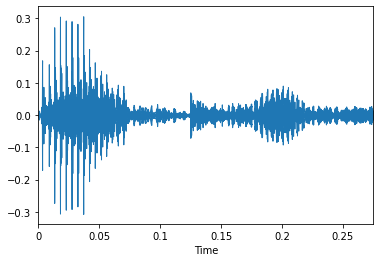

In [27]:
# checking segment audio
selected = 0
section = segments[selected]
section_data = audio[section[0]:section[1]]
print(section_data.shape)
print(section)

normed = normalize(librosa.feature.rms(audio[section[0]:section[1]], hop_length=hop_length,
                            frame_length=frame_length).flatten())
librosa.display.waveplot(section_data, sr=sr)
ipd.Audio(section_data, rate=sr)


In [29]:
#split by rate of change of energy
section = segments[selected]
part = audio[section[0]:section[1]]
phone_boundaries = Split2(part, hop_length=hop_length, frame_length=frame_length, sr= sr, min_duration=hop_length*10)
print(len(part))
#phone_boundaries.append(len(part))
print(hop_length*6)
print(part.shape)
print(phone_boundaries)
print(len(phone_boundaries))

4400
480
(4400,)
[[0, 802], [802, 1715], [1715, 2542], [2542, 3392], [3392, 4400]]
5


C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2210: RuntimeWarning: invalid value encountered in log1p
  smooth = np.exp(-gain * (np.log(eps) + np.log1p(S_smooth / eps)))
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2218: RuntimeWarning: invalid value encountered in log1p
  S_out = (bias ** power) * np.expm1(power * np.log1p(S * smooth / bias))


In [49]:
phone_boundaries[-1]

[3392, 4400]

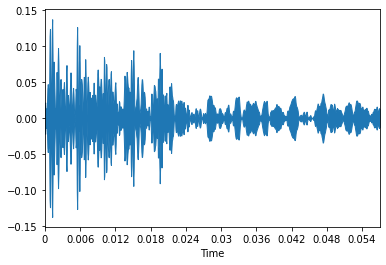

In [69]:
mnum =1
librosa.display.waveplot(part[phone_boundaries[mnum][0]:phone_boundaries[mnum][1]], sr=sr)
ipd.Audio(part[phone_boundaries[mnum][0]:phone_boundaries[mnum][1]], rate=sr)


4400
(4400,)
4400


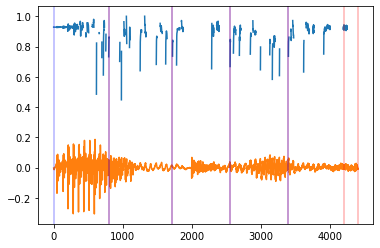

C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1400
  warnings.warn(
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\display.py:822: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\display.py:974: Matplotl

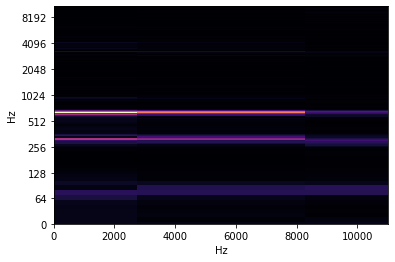

In [71]:
section = segments[selected]
part = audio[section[0]:section[1]]
e =librosa.pcen(part,hop_length=hop_length)
d = normalize(librosa.feature.delta(e))
print(len(e))
print(part.shape)
print(len(d))
#librosa.display.waveplot(part)
plt.plot(d)
plt.plot(part)
a = 2800
b = 4200
for x in phone_boundaries:
    plt.axvline(x=x[0], ymin=-0.4, ymax=1, c='b', alpha=0.3)
    plt.axvline(x=x[1], ymin=-0.4, ymax=1, c='r', alpha=0.3)
plt.axvline(x=b, ymin=-0.4, ymax=1, c='r', alpha=0.3)
plt.show()
stft = librosa.stft(part[a:b])
librosa.display.specshow(stft, y_axis="log", x_axis="linear")
ipd.Audio(part[a:b], rate =sr)

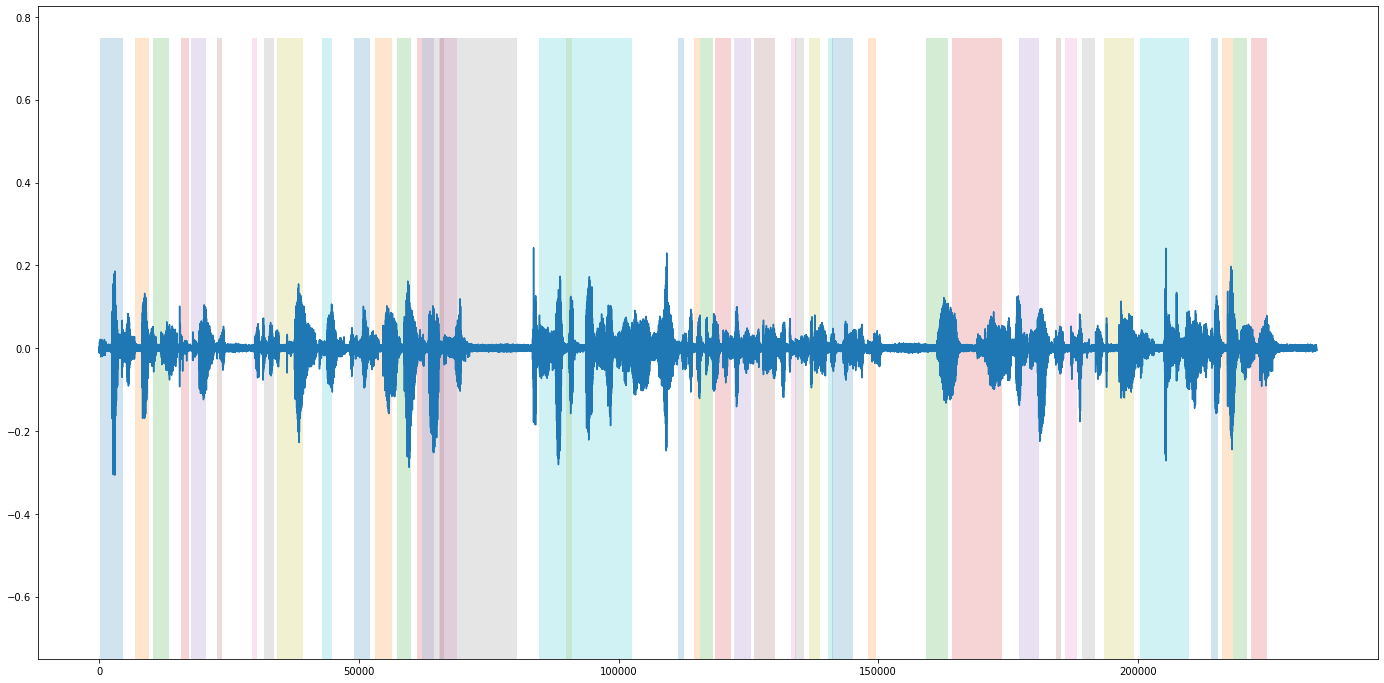

In [74]:
plt.figure(figsize=(24,12))
plt.plot(audio)
for x in segments:
    x1 = x[0]
    x2 = x[1]
    plt.bar(x1, height=1.5, width=(x2-x1), bottom=-0.75, alpha=0.2)
    

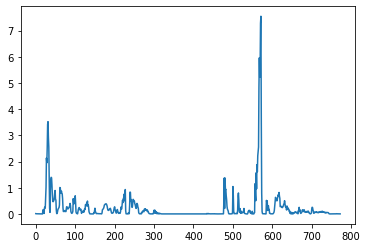

In [32]:
e2 = np.array([
    sum(abs(audio[i:i+frame_length]**2))
    for i in range(0, len(audio), frame_length)
])

audio.shape[0]/e2.shape[0]
plt.plot(e2)

In [90]:
segments_librosa = librosa.effects.split(audio,  frame_length=2048, hop_length=220)
voiced_libr = []
for x in segments_librosa:
    silenced[x[0]:x[1]] = audio[x[0]:x[1]]
    for i in audio[x[0]:x[1]]:
        voiced_libr.insert( len(voiced_libr),i )
voiced_libr = np.array(voiced_libr)
print(voiced_libr.shape)


print("transcription: ", transcription)
ipd.Audio(voiced,rate=sr)

(234480,)
transcription:  AND HIS BEST SUIT OF CLOTHES WHICH WAS PLAIN PROOF THAT HE WAS GOING OUT OF AVONLEA AND HE HAD THE BUGGY AND THE SORREL MARE WHICH BETOKENED THAT HE WAS GOING A CONSIDERABLE DISTANCE NOW WHERE WAS MATTHEW CUTHBERT GOING AND WHY WAS HE GOING THERE


1.0


C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2210: RuntimeWarning: invalid value encountered in log1p
  smooth = np.exp(-gain * (np.log(eps) + np.log1p(S_smooth / eps)))
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2218: RuntimeWarning: invalid value encountered in log1p
  S_out = (bias ** power) * np.expm1(power * np.log1p(S * smooth / bias))


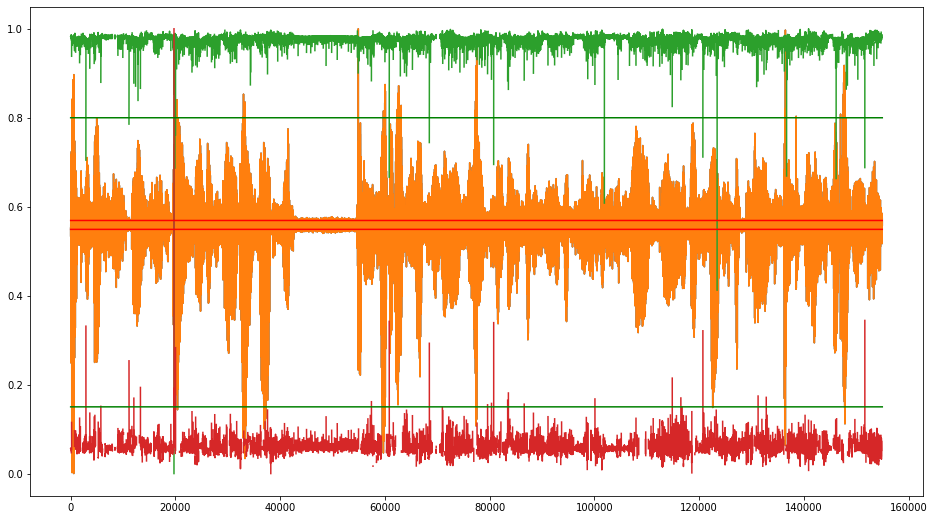

In [91]:
plt.figure(figsize=(16,9))
scaled_audio= (sklearn.preprocessing.minmax_scale(voiced, axis=0))
audio_range =  np.max(scaled_audio)- np.min(scaled_audio)
mean =np.mean(scaled_audio)
print(audio_range)
y = np.full(len(voiced),mean-audio_range*0.01) #audio non silence min
y1 = np.full(len(voiced),mean+audio_range*0.01) #audio non silence max
y2 = np.full(len(voiced),0.8)
y3 = np.full(len(voiced),0.15)
energy = librosa.pcen(np.array(voiced))
delta_energy = librosa.feature.delta(energy)
delta_energy2 = librosa.feature.delta(delta_energy)

plt.plot(sklearn.preprocessing.minmax_scale(voiced, axis=0)) # blue
plt.plot(sklearn.preprocessing.minmax_scale(voiced, axis=0)) #yellow
plt.plot(sklearn.preprocessing.minmax_scale(delta_energy, axis=0)) #green
plt.plot(sklearn.preprocessing.minmax_scale(delta_energy2, axis=0))
plt.plot(y,c='r')
plt.plot(y1,c='r')
plt.plot(y2,c='g')
plt.plot(y3,c='g')
#plt.plot(sklearn.preprocessing.minmax_scale(delta_energy2, axis=0))




(1025, 2932)


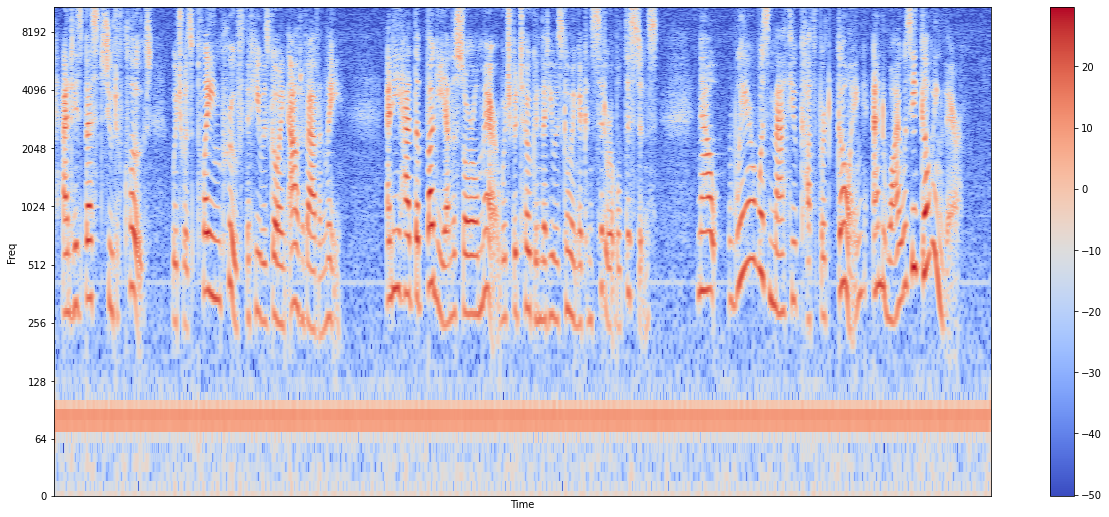

In [96]:
stft = librosa.stft(np.array(audio), hop_length=hop_length)
print(stft.shape)
spectogram = np.abs(stft)

log_spectogram = librosa.amplitude_to_db(spectogram)
spectogram

plt.figure(figsize=(21,9))
librosa.display.specshow(log_spectogram, y_axis='log')
plt.xlabel("Time")
plt.ylabel("Freq")
plt.colorbar()
plt.show()

In [2]:
def reduce_noise_centroid_s(y, sr):

    cent = librosa.feature.spectral_centroid(y=y, sr=sr)

    threshold_h = np.max(cent)
    threshold_l = np.min(cent)

    less_noise = AudioEffectsChain().lowshelf(gain=-12.0, frequency=threshold_l, slope=0.5).highshelf(gain=-12.0, frequency=threshold_h, slope=0.5).limiter(gain=6.0)

    y_cleaned = less_noise(y)

    return y_cleaned

In [50]:
from scipy import signal
def f_high(y,sr):
    b,a = signal.butter(1, 2000/(sr/2), btype='lowpass')
    yf = signal.lfilter(b,a,y)
    return yf
yf1 = f_high(audio, sr)
ipd.Audio(yf1,rate=sr)

In [51]:
audio = yf1

In [ ]:
a_file= open("test.txt","w")
np.savetxt(a_file, three)
a_file.close()